#### Apuntes del [Curso de Matemáticas para Data Science: Estadística Descriptiva](https://platzi.com/cursos/estadistica-descriptiva/) en Platzi

[![](images/cover.png)](https://platzi.com/cursos/estadistica-descriptiva/)

# ¿Para qué sirve la estadística descriptiva?

---

La estadística descriptiva sirve para 2 cosas:
- Anális exploratorio de la información.
- Preprocesamiento de la información antes de tener un modelo de machine learning.

## Estadística descriptiva vs. inferencial

**Estadística descriptiva:** resumir un historial de datos.

**Estadística inferencial:** predecir con datos.


### ¿Por qué aprender estadística?

- Resumir grandes cantidades de información para tomar mejores decisiones.
- Responder preguntas con relevancia social.
- Reconocer patrones en los datos.

## Flujo de trabajo en data science

Flujo del manejo de datos

![alt text](images/Untitled.png)

![alt text](images/Untitled1.png)

La estadística descriptiva está presente en los 2 primeros bloques, mientras que la inferencial está en los últimos.

### Flujo

- Estadísticos para ingesta y procesamiento:
    1. ¿Cuáles son los tipos de datos con los que estás trabajando? (identifícalos)
    2. Define el flujo de procesamiento de los datos para que sean útiles
- Estadísticos para analítica exploración:

    3. Análisis exploratorio de los datos (correlaciones y reducciones)

# Estadística descriptiva para analítica
---

## Tipos de datos en estadística inferencial
Puedes ver los tipos de datos con `dtypes`
- **Datos categóricos:** ordinales (object) y nominales (bool)
- **Datos numéricos:** discretos (int64) y continuos (float64)

Dataset con esos tipos de datos:
https://www.kaggle.com/lepchenkov/usedcarscatalog


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df = pd.read_csv("cars.csv")
df.head().style.background_gradient(cmap = 'coolwarm', axis=None)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.500000,universal,False,owned,all,10900.000000,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.000000,universal,False,owned,all,5000.000000,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.500000,suv,False,owned,all,2800.000000,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.000000,sedan,False,owned,all,9999.000000,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.500000,universal,False,owned,all,2134.110000,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


Tipos de datos del csv

In [ ]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

Generar un conjunto completo de estadísticos descriptivos (fundamentales) del dataset:

In [ ]:
df.describe().style.background_gradient(cmap = 'coolwarm', axis=None)

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


## Medidas de tendencia central

- Media → promedio (puede ser afectado por algo que se sale bastante del promedio)
- Mediana → dato central
- Moda → dato que más se repite (es de ayuda un diagrama de frecuencias y no aplica para datos numéricos continuos)


![alt text](images/Untitled2.png)

Todos los estadísticos descriptivos se pueden representar en este diagrama (distribuciones).

### Media o promedio → mean(df)

#### $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

![alt text](images/Untitled3.png)

### Mediana → median(df)

Cuando hay valores atípicos fuertes que puedan sesgar la media, es mejor emplear la mediana.

#### Mediana impar: $$ x_{(n+1)/2}^{\text{ordered}} $$

#### Mediana par: $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

![alt text](images/Untitled4.png)

Siempre y cuando los valores del DataFrame estén ordenados

### Moda

#### $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

### Aplicación y notas en Python (Deepnote)

In [ ]:
import pandas as pd

df = pd.read_csv('cars.csv')

In [ ]:
#Media
df['price_usd'].mean()

6639.971021255613

In [ ]:
#Mediana

In [ ]:
#Grafico en pandas de un histograma de frecuencia

fig1 = px.histogram(df, 
                    x='price_usd', 
                    color_discrete_sequence=['#FA0087'],
                    opacity=0.8)

fig1.update_layout(title = 'Grafica historial del precio vehiculos',
                   font = dict(family = 'verdana', size = 16, color = 'white'),
                   template = 'plotly_dark',
                   height = 500,
                   width = 900)

fig1.show()

Debido a que hay un fuerte sesgo de los autos con precios más elevados, la **mediana** funciona mejor que la **media**.

Resutla más interersante analizar los precios por marcas:

- **Pro tip**: usar [seaborn](https://seaborn.pydata.org/tutorial/distributions.html)

In [ ]:
# Se usara principalmente en estas notas la libreria Plotly

#distribution plot para hacer un histograma con las marcas de carros

fig1 = px.histogram(df, 
                    x='price_usd', 
                    color='manufacturer_name',
                    opacity = 0.8,
                    color_discrete_sequence=px.colors.qualitative.Dark24)

fig1.update_layout(title = 'Graficas de precio separado por marca de vehiculo',
                   font = dict(family = 'verdana', size = 16, color = 'white'),
                   template = 'plotly_dark',
                   height = 500,
                   width = 900,
                   legend_bgcolor='rgb(117, 112, 179)')

fig1.show()

#color crea un histograma por cada una de las categorías de manufactorer_name

In [ ]:
#Histograma, de barras apiladadf con el tipo de combustible que necesitan
fig1 = px.histogram(df, 
                    x='price_usd', 
                    color='engine_type', 
                    color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'],
                    opacity=0.8)

fig1.update_layout(title = 'Graficas de precio separado por marca de vehiculo',
                   font = dict(family = 'verdana', size = 16, color = 'white'),
                   template = 'plotly_dark',
                   height = 500,
                   width = 900,
                   legend_bgcolor='rgb(117, 112, 179)')

fig1.show()

No se ven los autos eléctricos, así que hay que contar cuántos hay

In [ ]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


Para hacer una inspección de una marca en específico se pueden aplicar filtros

In [ ]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]

fig = px.histogram(Q7_df, 
                   x='price_usd', 
                   color='year_produced',
                   opacity=0.8,
                   color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(title = 'Precio de marca Audi, modelo Q7',
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark',
                  height = 500,
                  width = 900,
                  legend_bgcolor='rgb(117, 112, 179)')

fig.show()

## Medidas de dispersión

- Rango: abarca desde el mínimo hasta el máximo en el conjunto de datos (todos los datos)
- Rango intercuartil (IQR): 4 subdivisiones homogéneas de los datos
- Desviación estándar

![alt text](images/image-20210608-145124.png)

El diagrama de caja es la visualización para representar simplificadamente la dispersión de los datos en referencia a la mediana.

### Desviación estándar

Es la medida de dispersión de datos más utilizada. Matemáticamente es la raíz de la media del error cuadrático. Cuando se está trabajando con muestras en vez de la población, se hace una corrección haciendo que se divida para `n-1`.

![alt text](images/image-20210608-150624.png)

Si los datos siguen una distribución normal, si se considera todos los datos que están en un rango de `promedio ± 3*desviación estándar` se estaría abarcando el 99.72% de los datos de la distribución. Los puntos que se salen de eso no corresponden con el patrón y se conocen como outliers y a veces se los descarga. En otras palabras, si los datos están más allá de `3*std`, se descartan.


#### Correcion a lo indicado en las notas originales, los outliers algunas veces se descartan, pero es mejor practica no hacerlo

Depende, si hemos corroborado que estos valores atípicos no se deben a un error a la hora de construir la base de datos o en la medición de la variable, eliminarlos no es la solución. Si no se debe a un error, eliminarlo o sustituirlo puede modificar las inferencias que se realicen a partir de esa información, debido a que introduce un sesgo, que disminuye el tamaño muestral y que puede afectar tanto a la distribución como a las varianzas. Por lo tanto, sin pruebas contundentes de que sea un error de construccion de la base de datos, no debemos borrar nueestros outliers.

Además, ¡en la variabilidad de los datos reside el tesoro de nuestra investigación!

Es decir, la variabilidad (diferencias en el comportamiento de un fenómeno) debe explicarse no eliminarse. Y si aún no puedes explicarla al menos debes poder disminuir la influencia de estos valores atípicos en tus datos.

La mejor opción es quitarle peso a esas observaciones atípicas mediante técnicas robustas.

Los métodos estadísticos robustos son técnicas modernas que hacen frente a estos problemas. Son similares a los clásicos pero se ven menos afectados por la presencia de valores atípicos o variaciones pequeñas respecto a las hipótesis de los modelos.

Puede considerarse la discretización como medio de lidiar con nuestros outliers.

---------------------------------------------


Si siguen una distribución asimétrica, no aplica lo anterior, si no que se crean funciones para determinar qué datos son relevantes. Pero generalmente solo se usa para desviación estándar para distribuciones simétricas.

### Medidas de dispersión en Python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')

Calcular la desviación estándar

In [ ]:
df['price_usd'].std()

6428.1520182029035

In [ ]:
#Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [ ]:
#Quartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25) #toma el primer 25% de todos los datos
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1)
print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [ ]:
iqr = Q3 - Q1
iqr

6890.0

### Límites para detección de outliers (con datos simétricamente distribuídos)

In [ ]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.3*iqr
print(minlimit, maxlimit)

-8235.0 17947.0


El valor es negativo porque se está aplicando una ecuación de una distribución simética a una no simétrica.

In [ ]:
fig1 = px.histogram(df, 
                    x="price_usd",
                    opacity=0.8, 
                    color_discrete_sequence=['#FA0087'])

fig1.update_layout(title = 'Grafica de cantidad de autos por precio',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 500,
                 width = 900)
fig1.show()


fig2 = px.box(df, 
              x='price_usd', 
              color_discrete_sequence=['#FA0087'])

fig2.update_layout(title = 'Grafica de cantidad de autos por precio',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 500,
                 width = 900)
fig2.show()

In [ ]:
fig = px.box(df, 
             x='price_usd', 
             y='engine_fuel', 
             color = 'engine_fuel',
             color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(title = 'Grafica de precio por tipo de combustible usado',
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark',
                  height = 500,
                  width = 900,
                  legend_bgcolor='rgb(117, 112, 179)')

fig.show()

## Exploración visual de los datos

Hay que saber qué gráfico es el correcto para enseñar los datos en cuestión.

---
Esta página tiene todos los gráficos y explica en qué consiste cada uno de ellos y deja ejemplos de uso reales. También te permite clasificarlos en función de los inputs y formas.

**Enlace: https://datavizproject.com/**

---


### Diagramas de dispersión en el análisis de datos

Para esto se va a trabajar con un nuevo dataset clásico. Se trata de iris y lo que trae es datos de atributos especiales de unas flores llamadas iris, vienen en 3 especies distintas. El dataset viene por defecto en seaborn.

In [ ]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Documentación de scatterplot (diagrama de dispersión): http://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [ ]:
fig1 = px.scatter(iris,
                  x="sepal_length", 
                  y="petal_length", 
                  color='species', 
                  color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'],
                  opacity=0.8)

fig1.update_layout(title='Longitud de petalo/Longitud sepalo',
                   xaxis_title='Longitud de sepalo',
                   yaxis_title='Longitud de petalo',
                   font=dict(family='verdana', size = 16, color = 'white'),
                   template='plotly_dark',
                   height=500,
                   width=900,
                   legend_bgcolor='rgb(117, 112, 179)')

fig1.show()

Jointplot muestra un scatterplot y la distribución de los datos.

Documentación de jointplot: http://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
fig1 = px.scatter(iris, 
                  x="sepal_length", 
                  y="petal_length", 
                  color='species',
                  color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'],
                  marginal_x="box", 
                  marginal_y="box",
                  opacity=0.8)

fig1.update_layout(title='Longitud de petalo/Longitud sepalo',
                   xaxis_title='Longitud de sepalo',
                   yaxis_title='Longitud de petalo',
                   font = dict(family='verdana', size = 16, color = 'white'),
                   template='plotly_dark',
                   height=500,
                   width=900,
                   legend_bgcolor='rgb(117, 112, 179)')

fig1.show()

Documentación de boxplot: http://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
fig = px.box(iris, 
             x='species', 
             y="sepal_length", 
             color='species',
             color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'])

fig.update_layout(title='Comparativa Tamaño sepalo flor por especie',
                  xaxis_title='Especie',
                  yaxis_title='Longitud de petalo',
                  font=dict(family='verdana', size = 16, color = 'white'),
                  template='plotly_dark',
                  height=500,
                  width=900,
                  legend_bgcolor='rgb(117, 112, 179)')

fig.show()

Documentación de barplot: http://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
fig = px.bar(iris, 
             x='species', 
             y="sepal_length", 
             color='species', 
             color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'],
             opacity=0.8, 
             barmode='overlay')

fig.update_layout(title='Comparativa Tamaño sepalo flor por especie',
                  xaxis_title='Especie',
                  yaxis_title='Longitud de petalo',
                  font=dict(family = 'verdana', size = 16, color = 'white'),
                  template='plotly_dark',
                  height=500,
                  width=900,
                  legend_bgcolor='rgb(117, 112, 179)', 
                  xaxis={'categoryorder':'category descending'})

fig.show()

# Estadística en la ingesta de datos
---

## Pipelines de procesamiento para variables numéricas

### Escalamiento lineal

Es importante normalizar los datos (hacer escalamiento lineal), antes de pasarlos por un modelo de machine learning. Esto porque los modelos son eficientes si están en el mismo rango `[-1, 1]`. Si no están en ese rango, tienen que ser transformados (escalados).

Hay diferentes tipos de escalamiento lineal (max-min, Clipping, Z-score, Winsorizing, etc.). Se los usa normalmente cuando la data es simétrica o está uniformemente distribuida.

### Tipos de escalamiento lineal

- **Min-max**: hace una transformación para que los datos entren en el rango `[-1, 1]` por medio de una fórmula. Es uno de los más usados. **Funciona mejor para datos uniformemente distribuidos**.
- **Clipping**: fuerza a que los datos que se salen del rango, se transformen en datos dentro del mismo. Este método no es muy recomendado porque descarta valores outliers que puede que estén funcionando bien.
- **Winsorizing**: una variación del clipping que usa los quartils como extremos.
- **Z-Score**: es uno de los más comunes porque está basado en el promedio y desviación estándar. **Funciona mejor para datos distribuidos "normalmente" (forma de campana de Gauss)**.

![alt text](images/image-20210609-082604.png)

![alt text](images/image-20210609-083656.png)

### Transformaciones lineales en Python

Se utilizará este dataset de scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [ ]:
import timeit #para medir el tiempo de ejecución de los modelos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model #datasets para descargar un modelo y linear_model para hacer una regresión lineal

X, y = datasets.load_diabetes(return_X_y=True) #carga el dataset
raw = X[:, None, 2] #transformación en las dimensiones para que se ajuste al formato de entrada del preprocesamiento

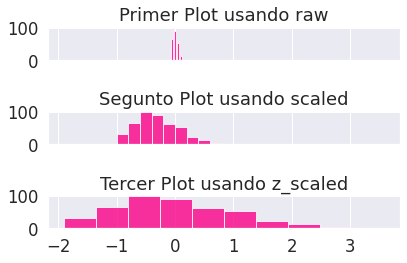

In [ ]:
#reglas de escalamiento lineal, aplicamos max-min
max_raw = max(raw)
#raw = datos crudos
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)


# normalización por el metodo del  Z-score

avg = np.average(raw) # μ media u averaje de raw
std = np.std(raw) # σ la desviación estándar de la población raw
z_scaled = (raw - avg)/std # comparan cada valor de raw para saber el Z-Score, esto es la misma que scaled del metodo anterior solo que calculado por otro metodo y luego se compara a ver cual normalizo de mejor manera los datos del dataset raw


# Graficas
# es importante tener una noción de los datos originales antes y después de escalarlos:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, tight_layout=True)

ax1.hist(raw, 
            color='#FA0087',
            alpha=0.8)
ax1.set_title('Primer Plot usando raw')
ax2.hist(scaled, 
            color='#FA0087',
            alpha=0.8)
ax2.set_title('Segunto Plot usando scaled')
ax3.hist(z_scaled, 
            color='#FA0087',
            alpha=0.8)
ax3.set_title('Tercer Plot usando z_scaled')

plt.show()


In [ ]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number=100) #repite la ejecución del código 100 veces y sobre eso calcula el tiempo
scaled_time = timeit.timeit(train_scaled, number=100)
z_scaled_time = timeit.timeit(train_raw, number = 100)


print(f'train raw: {raw_time}')
print(f'train scaled: {scaled_time}')
print(f'trainning time for z_scaled data : {z_scaled_time}')

train raw: 0.05147296500035736
train scaled: 0.043351549000362866
trainning time for z_scaled data : 0.045472017000065534


**Se puede ver como al normalizar los datos, el algoritmo se vuelve más eficiente.**

---

Scikit Learn tiene una parte de prepocesamiento, en su documentación encontrarás cómo estandarizar datos numéricos y catergóricos.

Utilidades de Scikit Learn: https://scikit-learn.org/stable/modules/preprocessing.html

---

### Transformación no lineal

Cuando la data no es simétrica o uniforme, sino que está muy sesgada, se le aplica una transformación para que tengan una distribución simétrica y se pueda aplicar los escalamientos lineales.

Hay diferentes tipos de de funciones no lineales: logaritmos, sigmoides, polinomiales, etc. Estas funciones se les puede aplicar a los datos para transformarlos y hacerlos homogéneos.

#### Tanh(x)

La tanh siempre está en un rango de -1 a 1 en Y, por lo que, cuando los valores de X son muy altos, estarán muy cercanos al |1|. También se podría calibrar los datos para ajustar la curva, dividiéndolos por un parámetro a.

![alt text](images/image-20210609-085317.png)

#### Raíz cuadrada

Otras funciones polinomiales, por ejemplo la raíz cuadrada (x½), también pueden hacer que una distribución se normalice.

![alt text](images/image-20210609-085600.png)

Hay un abanico gigante de maneras para hacer estas transformaciones con funciones no lineales. Los anteriores fueron solo 2 ejemplos. Las más famosas son la tanh y la sigmoide porque ambas amplian los valores importantes y acercan al 0, mientras que a los outliers los minimizan y acercan a -1 y 1.

### Transformaciones no lineales en Python

In [ ]:
df = pd.read_csv('cars.csv')

In [ ]:
# Acá se puede apreciar como la distribución está fuertemente sesgada

fig2 = px.histogram(df, 
                    x="price_usd", 
                    nbins=10,
                    color_discrete_sequence=['#FA0087'],
                    opacity=0.8)

fig2.update_layout(title = 'Grafica curso estadistica descriptiva',
                   font = dict(family = 'verdana', size = 16, color = 'white'),
                   template = 'plotly_dark',
                   height = 500,
                   width = 900)
fig2.show()

In [ ]:
# Transformación con tanh(x)

# Esta línea toma la columna y le aplica a toda una función matemática
p = 8000

fig2 = px.histogram(df, 
                    x=df.price_usd.apply(lambda x: np.tanh(x/p)), 
                    nbins=10, 
                    color_discrete_sequence=['#FA0087'],
                    opacity=0.8)

fig2.update_layout(title = 'Grafica curso estadistica descriptiva',
                   font = dict(family = 'verdana', size = 16, color = 'white'),
                   template = 'plotly_dark',
                   height = 500,
                   width = 900)
fig2.show()

En esta documentación encontrarás diversas maneras de hacer esas transformaciones no lineales. De esa manera podrás aplicar las funciones que trae Scikit Learn para hacer las transformaciones.

Mapear datos a una distribución Gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html


## Pipelines de procesamiento para variables categóricas

Cuando se tiene variables categóricas se hace un mapeo numérico. Para eso hay 2 métodos, de manera que sean fácilmente interpretables en modelos de machine learning:

- **Dummy**: es la representación más compacta que se puede tener de los datos. Es mejor usarla cuando los inputs son variables linealmente independientes (no tienen un grado de correlación significativo). Es decir, las cuando se sabe que las categorías son independientes entre sí.
- **One-hot**: es más extenso. Permite incluir categorías que no estaban en el dataset inicialmente. De forma que si se filtra una categoría que no estaba incluida, igual se pueda representar numéricamente y no de error en el modelo (este modelo es más cool y es el que se usa).

Hay errores en la notación de Pandas y los tratan como que ambos modelos son lo mismo, pero en la realidad el Dummy no se usa. Aún así, en Pandas el método es `.get_dummies()`.

Ejemplo de aplicación de ambos:

![alt text](images/image-20210609-104522.png)

### Procesamiento de datos categóricos en Python

In [ ]:
import pandas as pd

df = pd.read_csv('cars.csv')

Documentación de Pandas dummies: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


Documentación de One-hot con Scikit: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [ ]:
import sklearn.preprocessing as preprocessing

encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.transform([['gasoline'],['diesel'], ['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

Las variables numéricas discretas (números enteros) también pueden ser codificadas como categóricas

In [ ]:
encoder.fit(df[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.transform([[2016], [2009], [190]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

En este caso la dimensionalidad del dataset se ve demasiado afectada, así que hay que buscar hacer una reducción de los datos.

## Correlaciones: covarianza y coeficiente de correlación

Si 2 variables están correlacionadas, estarían aportando la misma información, por lo que no sería útil tener las 2 variables en el modelo si su correlación es muy alta.

La forma de encontrar las correlaciones es usando al covarianza:

![alt text](images/image-20210609-111204.png)

Pero como las escalas de X y Y pueden ser distintas, entonces se usa el coeficiente de correlación (ρ):

![alt text](images/image-20210609-111237.png)

Mientas más alto sea el coeficiente de correlación (más cercano a 1) más alta es la correlación, mientras más cercano a 0 significa que no hay correlacion, y si el valor es cercano a -1, entonces hay una correlación inversa:

![alt text](images/image-20210609-111459.png)

### Matriz de covarianza

Cuando hay muchas variables (lo que pasa normalmente), se debe calcular todas las posibles covarianzas de las parejas de datos del dataset. El resultado de este cálculo, representado en una matriz, es la matriz de covarianza.

![alt text](images/image-20210609-113436.png)

Siempre se la usa en los análisis exploratorios de datos.

### Matriz de covarianza en Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

iris = sns.load_dataset('iris')

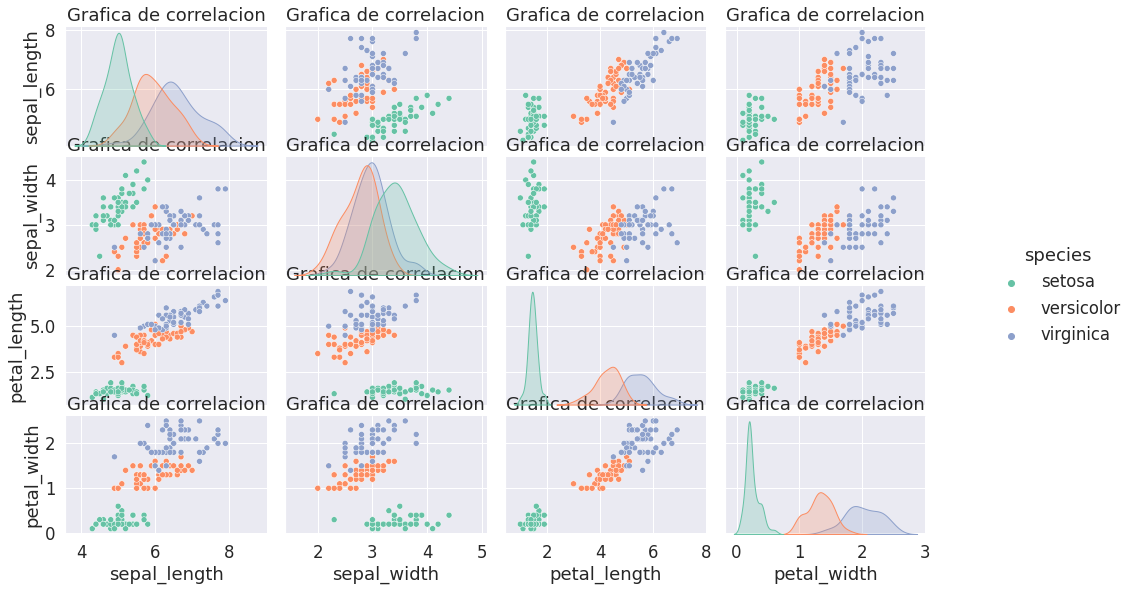

In [ ]:
g = sns.pairplot(iris, 
                 hue = 'species', 
                 palette='Set2')

g.fig.set_size_inches(16,8)

g.set(title='Grafica de covarianza')

plt.show()

 #este gráfico no sirve si hay demasiadas variables

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
scaled.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [ ]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
iris_covariance_matrix = pd.DataFrame(covariance_matrix,
                                    index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
                                    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_covariance_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.118359,0.877604,0.823431
sepal_width,-0.118359,1.006711,-0.431316,-0.368583
petal_length,0.877604,-0.431316,1.006711,0.969328
petal_width,0.823431,-0.368583,0.969328,1.006711


In [ ]:
# Mapa de calor de la matriz de covarianza
fig = px.imshow(iris_covariance_matrix,
                color_continuous_scale='Portland')

fig.update_layout(title = 'Heatmaps de matrix de covarianza de nuestro dataset iris',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 600,
                 width = 800)

fig.show()

In [ ]:
fig = px.imshow(iris.corr(),
                color_continuous_scale='Portland')

fig.update_layout(title = 'Heatmaps de correlacion de nuestro dataset iris',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 750,
                 width = 900)

fig.show()

Este proceso se conoce como reducción de datos y consiste en eliminar datos altamente correlacionados , se basa en la matriz de covarianza y se le llama análisis de componentes principales.

# Bonus: comandos de Pandas y Seaborn usados en el curso
---

|Código|▶ Función|
|---|---|
|**Pandas**||
|`pd.read_csv('ruta')`|-> Lee el DataFrame y lo puedes almacenar en una variable {df}|
|`df.dtypes`|-> Los tipos de todas las columnas|
|`df.describe()`|-> Conjunto completo de estadísticos descriptivos (fundamentales)|
|`df.groupby('categoria').count()`|-> Agrupa los datos por la variable categórica y los cuenta|
|`df['categoria'].mean()`|-> Saca la media de todos los datos de esa categoría|
|`df['category'].plot.hist(bins=20)`|-> Histograma de frecuencua con intervalos de valores (bins)|
|---------------------------------|---------------------------------|
|**Seaborn**||
|`sns.scatterplot(data=dataset, x='x_column', y='y_column')`|-> Grafica un scatterplot (diagrama de dispersión). Si añades `hue='categoría'`, aparece en colores clasificados.|
|`sns.jointplot(data=dataset, x='x_column', y='y_column')`|-> Grafica un scatterplot y sus distribuciones. Si añades `hue='categoría'`, aparece en colores clasificados.|
|`sns.boxplot(data=iris, x='species', y='sepal_length')`|-> Grafica los cuartiles.|
|`sns.barplot(data=iris, x='species', y='sepal_length')`|-> Grafica un diagrama de barras.|

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f9350738-38bd-458a-b2ca-e2031ac489b4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>